<h1>Content</h1>
<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#1">Load Libraries</a></li>
        <li><a href="#2">Load Dataset</a></li>
        <li><a href="#3">Exploratory Data Analysis (EDA)</a></li>
        <li><a href="#4">Visualisation</a></li>
            <ol>
                <li><a href="#8">Line Plot</a></li>
                <li><a href="#6">Box Plot</a></li>
                <li><a href="#7">Time Series Decomposition</a></li>
            </ol>
        <li><a href="#5">Observe for Independent Feature</a></li>        
        <li><a href="#9">Feature Engineering</a></li>
            <ol>
                <li><a href="#10">Log Transformations</a></li>
                <li><a href="#11">Let's Try Anomaly Detection Method</a></li>
            </ol>
        <li><a href="#12">Train-Test Split of Time Series Dataset</a></li>
        <li><a href="#13">Prediction Methods</a></li>
            <ol>
                <li><a href="#14">ARIMA</a></li>
                <li><a href="#15">Let's Try Anomaly Detection Method</a></li>
                <li><a href="#16">Simple Exponential Smoothing</a></li>
                <li><a href="#17">Holt Linear Trend</a></li>
                <li><a href="#18">Holt-Winters Method</a></li>
                <li><a href="#19">Deep Learning Methods</a></li>
                <ol>
                    <li><a href="#20">RNN</a></li>
                    <li><a href="#21">LSTM</a></li>
                </ol>
            </ol>
        <li><a href="#22">Compare Models</a></li>
    </ol>
</div>
<br>
<hr>

## DATA
* https://www.kaggle.com/c/web-traffic-time-series-forecasting/overview

<a id="1"></a>
## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
#
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
#
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
# plot parameters
%matplotlib inline
sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
#
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## Load Dataset

In [2]:
train_2 = pd.read_csv(r"C:\Users\monster\Desktop\time_series\second\train_2.csv")
train_2.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2017-09-01  2017-09-02  2017-09-03  2017-09-04  \
0        26.0  ...        19.0        33.0        33.0        18.0   
1        10.0  ...        32.0        30.0        11.0        19.0   
2         4.0  ...         6.0         6.0         7.0         2.0   
3        11.0  ...         7.0        19.0        19.0         9.0   
4         NaN  ...        16.0        16.0        19.0         9.0   

   2017-09-05  2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  
0        16.0        27.0        29.0        23.0        54.0        38.0  
1        54.0        25.0        26.0        23.0        13.0        81.0  
2         4.0         7.0         3.0         4.0         7.0         6.0  
3         6.0        16.0        19.0        30.0        38.0         4.0  
4        20.0        23.0        28.0        14.0         8.0         7.0  

[5 rows x 804 columns]

<a id="3"></a>
## Exploratory Data Analysis (EDA)

In [3]:
# Choose a page to make prediction
df = train_2[train_2.Page == "Energy_zh.wikipedia.org_all-access_spider"]
df

Page  2015-07-01  2015-07-02  \
42  Energy_zh.wikipedia.org_all-access_spider        16.0         7.0   

    2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
42         3.0         3.0         3.0         5.0         5.0         4.0   

    2015-07-09  ...  2017-09-01  2017-09-02  2017-09-03  2017-09-04  \
42         3.0  ...        11.0        10.0        12.0         8.0   

    2017-09-05  2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  
42         7.0        12.0        20.0        12.0        10.0         7.0  

[1 rows x 804 columns]

In [4]:
# drop unnecessary feature
df.drop("Page",axis=1,inplace=True)

In [5]:
# transpoze to change columns and indexes
df = df.T
df.head()

42
2015-07-01  16.0
2015-07-02   7.0
2015-07-03   3.0
2015-07-04   3.0
2015-07-05   3.0

In [6]:
# change column name
df = df.rename(columns={42:"visits"})
df.head()

visits
2015-07-01    16.0
2015-07-02     7.0
2015-07-03     3.0
2015-07-04     3.0
2015-07-05     3.0

In [7]:
# change datatypes
df.reset_index()
df["index"] = df.index.astype('datetime64[ns]')
df = df.set_index("index")
df.head()

visits
index             
2015-07-01    16.0
2015-07-02     7.0
2015-07-03     3.0
2015-07-04     3.0
2015-07-05     3.0

In [8]:
print("Number of rows and columns:", df.shape)
print("The time series starts from:", df.index.min())
print("The time series ends on:", df.index.max())

Number of rows and columns: (803, 1)
The time series starts from: 2015-07-01 00:00:00
The time series ends on: 2017-09-10 00:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 803 entries, 2015-07-01 to 2017-09-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   visits  803 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


In [10]:
df.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10'],
              dtype='datetime64[ns]', name='index', length=803, freq=None)

In [11]:
df.index.freq = "D"

### Summary Statistics
* Mean : Balance Point
* Median : Middle Value "when ordered"
* Variance : The average of the squared distance of the mean
* Standard Deviation : The square root of the variance

In [12]:
df.describe()

visits
count  803.000000
mean     9.341220
std      9.978187
min      0.000000
25%      5.000000
50%      8.000000
75%     11.000000
max    137.000000

<a id="4"></a>
## Visualisation

<a id="8"></a>
## Line Plot

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["visits"], name="Visits"))
fig.update_layout(showlegend=True, title="Visits")
fig.show()

<a id="6"></a>
## Box Plot
We will display statistics

A box plot is a graphical method to summarize a data set by visualizing the minimum value, 25th percentile, median, 75th percentile, the maximum value, and potential outliers. A percentile is the value below which a certain percentage of data fall. For example, if 75% of the observations have values lower than 685 in a data set, then 685 is the 75th percentile of the data. At the 50th percentile, or median, 50% of the values are lower and 50% are higher than that value.

In [14]:
trace = [go.Box(y=df["visits"],name="Visits")]
layout = go.Layout(title='Visits Distribution')
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

<a id="7"></a>
## Time Series Decomposition

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.

In [15]:
from matplotlib.pylab import rcParams
%matplotlib inline
sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8

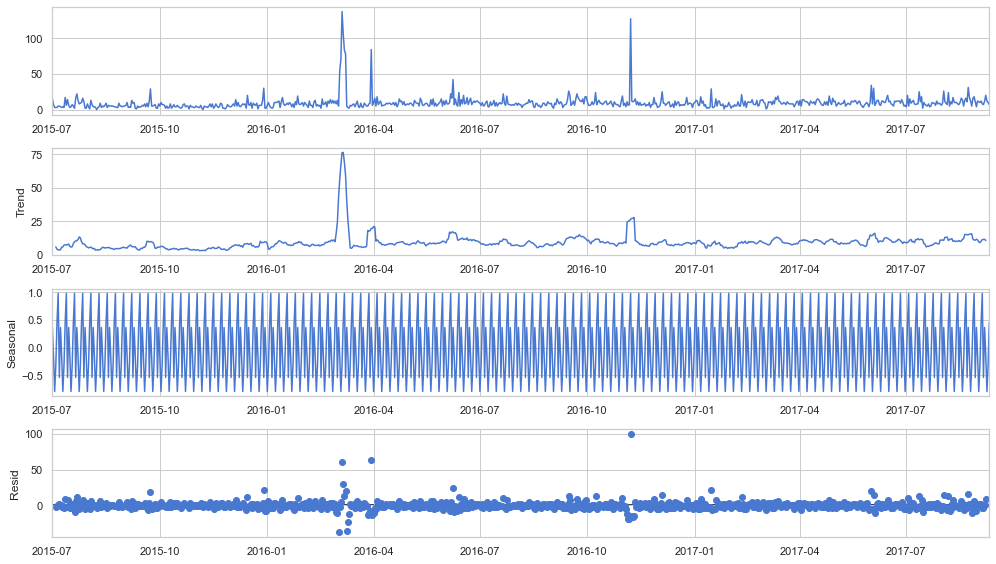

In [16]:
result = seasonal_decompose(df,model='additive')

result.plot()
plt.show()

<a id="5"></a>
## Observe for Independent Feature

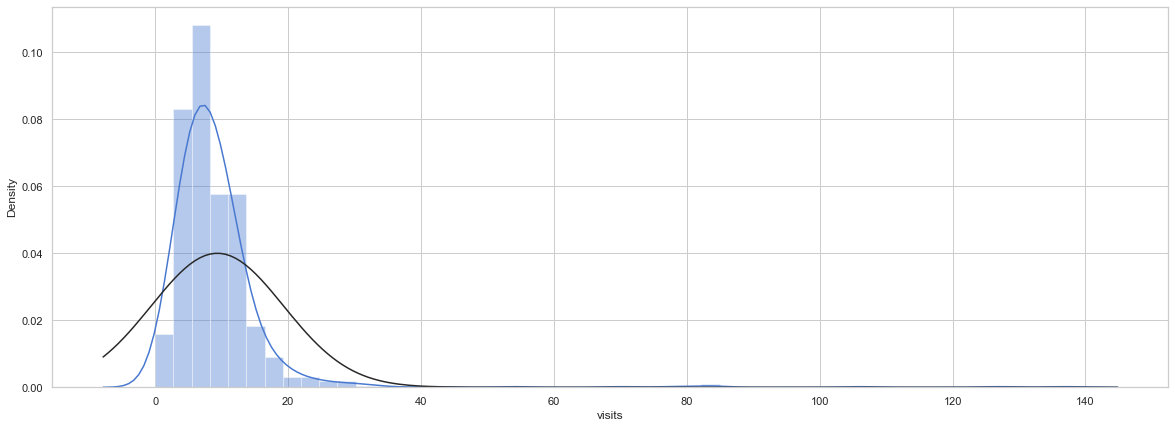

In [17]:
# If we ignore values in tail, we can say that we have normal dist
f,ax = plt.subplots(figsize = (20,7))
sns.distplot(df["visits"], fit=norm);

We expect that our data points will be on red line for gaussian distributin. We see dist tails


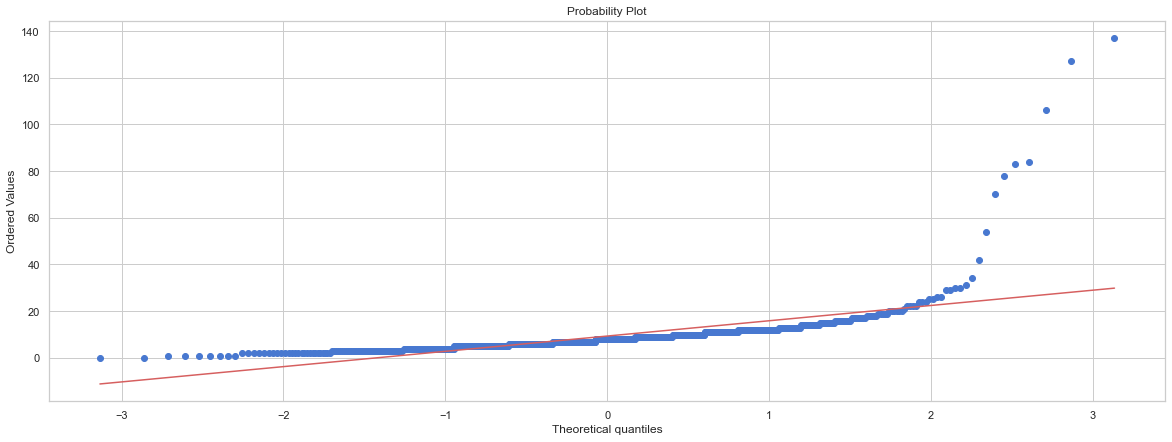

In [18]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(df["visits"],plot=plt)
plt.show
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")

<a id="9"></a>
## Feature Engineering

<a id="10"></a>
### Log Transformations
* The log transformation can be used to make highly skewed distributions less skewed.
* http://onlinestatbook.com/2/transformations/log.html

In [19]:
df["log"] = np.log1p(df["visits"])

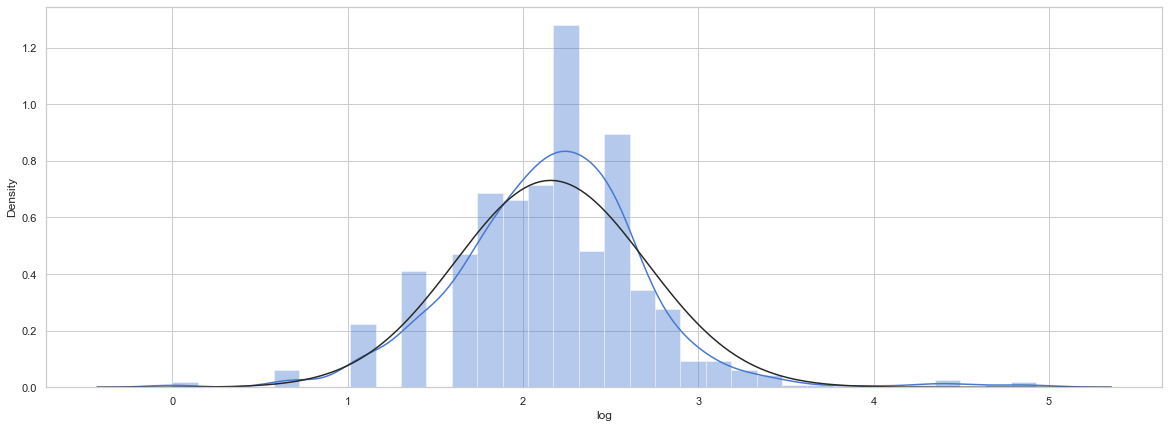

In [20]:
f,ax = plt.subplots(figsize = (20,7))
sns.distplot(df["log"], fit=norm);

## As we see there are still outliers

In [21]:
trace = [go.Box(y=df["log"],name="Visits")]
layout = go.Layout(title='Visits Distribution')
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

<a id="11"></a>
## Let's Try Anomaly Detection Method

In [22]:
df.drop("log",axis=1,inplace=True)

## ThresholdAD

In [23]:
from adtk.data import validate_series
s = validate_series(df)

In [24]:
df.describe().T

count     mean       std  min  25%  50%   75%    max
visits  803.0  9.34122  9.978187  0.0  5.0  8.0  11.0  137.0

In [25]:
from adtk.detector import ThresholdAD
# mean + std
# mean - std
high = np.mean(df.visits) + np.std(df.visits)
low  = np.mean(df.visits) - np.std(df.visits)
threshold_ad = ThresholdAD(high=high, low=low)
anomalies = threshold_ad.detect(s)

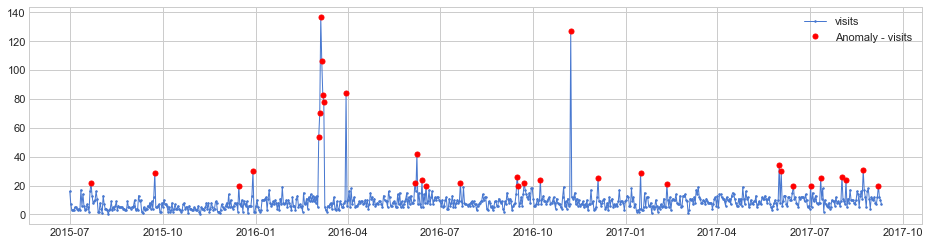

In [26]:
from adtk.visualization import plot
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

In [27]:
# create a checkpoint
df_2 = df.copy()

In [28]:
# change the anomalies with mean value
df_2[anomalies.visits == True] = np.mean(df.visits)

In [29]:
# Let's New Dataframe
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_2.index, y=df_2["visits"], name="Visits"))
fig.update_layout(showlegend=True, title="Visits")
fig.show()

In [30]:
df_2.describe().T

count     mean       std  min  25%  50%   75%   max
visits  803.0  8.02274  3.646634  0.0  5.0  8.0  10.0  19.0

<a id="12"></a>
## Train-Test Split of Time Series Dataset

In [31]:
train_size = int(len(df_2) * 0.66)
test_size = len(df_2) - train_size
train, test = df_2.iloc[0:train_size], df_2.iloc[train_size:len(df_2)]
print(train.shape, test.shape)

(529, 1) (274, 1)


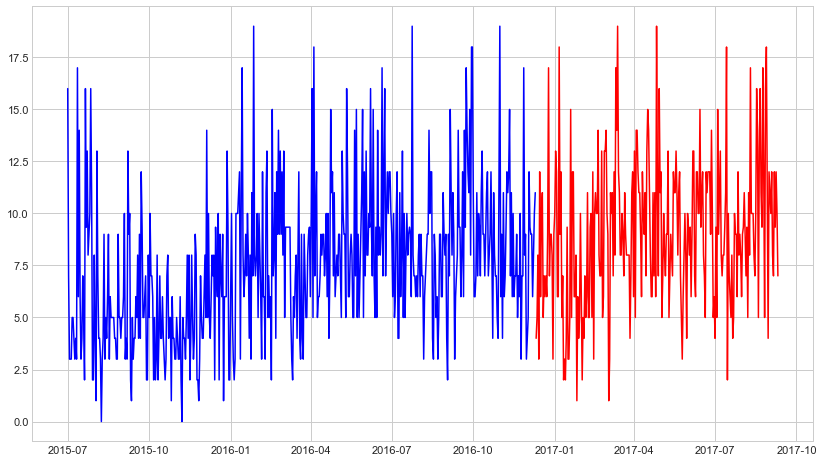

In [32]:
plt.plot(train,color="blue")
plt.plot(test,color='red')
plt.show()

<a id="13"></a>
## Prediction Methods

<a id="14"></a>
## ARIMA

* ARIMA stands for Autoregressive Integrated Moving Average and has three components, p, d, and q, that are required to build the ARIMA model. These three components are:

* p: Number of autoregressive lags

* d: Order of differencing required to make the series stationary

* q: Number of moving average lags

<hr>

### Stationary Series
* Time series are stationary
if they do not have trend or seasonal effects
* The time series should be stationary for ARIMA 
* A stationary series is one where the properties do not change over time.(mean and varians)
* There are several methods to check the stationarity of a series. 
* We will use the Augmented Dickey-Fuller test for stationary or not.

<hr>

## Augmented Dickey-Fuller Test
* The Augmented Dickey-Fuller test is a type of statistical unit root test. The test uses an autoregressive model and optimizes an information criterion across multiple different lag values.
<hr>
* Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
<hr>
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
<hr>
* We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non stationary).
* p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is
non-stationary.
* p-value ≤ 0.05: Reject the null hypothesis (H0), the data does not have a unit root and
is stationary.

In [33]:
# Augmented Dickey-Fuller Test
result = adfuller(train["visits"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.774395
p-value: 0.003180
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


* The output above shows that the p-value is slightly lower than the threshold value of 0.05 which means you reject the null hypothesis. The series seems stationary.

In [34]:
# Make ARIMA model 
history = [x for x in train.visits]
predictions = list()
# walk-forward validation
for i in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0][0]
    predictions.append(yhat)
    #observations
    history.append(test.visits[i])

In [35]:
test['ARIMA'] = predictions
test.head()

visits     ARIMA
index                       
2016-12-11     4.0  8.221669
2016-12-12     5.0  7.920283
2016-12-13     8.0  7.710065
2016-12-14     3.0  7.726670
2016-12-15    12.0  7.385408

In [36]:
mse = mean_squared_error(test.visits, test.ARIMA)
print("ARIMA_MSE:{:.0f}".format(mse))

ARIMA_MSE:12


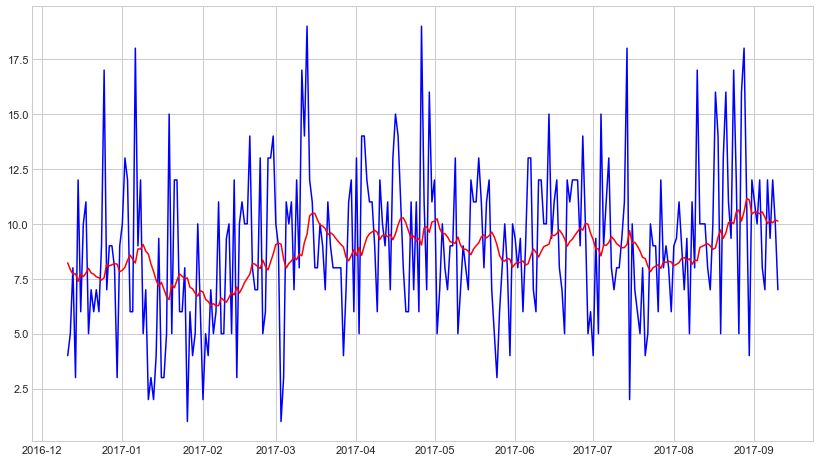

In [37]:
# plot forecasts against actual outcomes
plt.plot(test.visits, color="blue")
plt.plot(test.ARIMA, color="red")
plt.show()

<a id="16"></a>
## Simple Exponential Smoothing
* In the exponential smoothing method, forecasts are produced using weighted averages of past observations, with the weights decaying exponentially as the observations get older. 
* smoothing_level: The value of the smoothing parameter for the level is decided by the parameter

In [38]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

model1 = SimpleExpSmoothing(np.asarray(train['visits'])).fit(smoothing_level=0.1,optimized=False)
test['SimpleExp'] = model1.predict(len(test)-19)

In [39]:
test.head()

visits     ARIMA  SimpleExp
index                                  
2016-12-11     4.0  8.221669   7.622070
2016-12-12     5.0  7.920283   7.459863
2016-12-13     8.0  7.710065   7.213876
2016-12-14     3.0  7.726670   7.192489
2016-12-15    12.0  7.385408   7.273240

In [40]:
mse = mean_squared_error(test.visits, test.SimpleExp)
print("SimpleExp_MSE:{:.0f}".format(mse))

SimpleExp_MSE:13


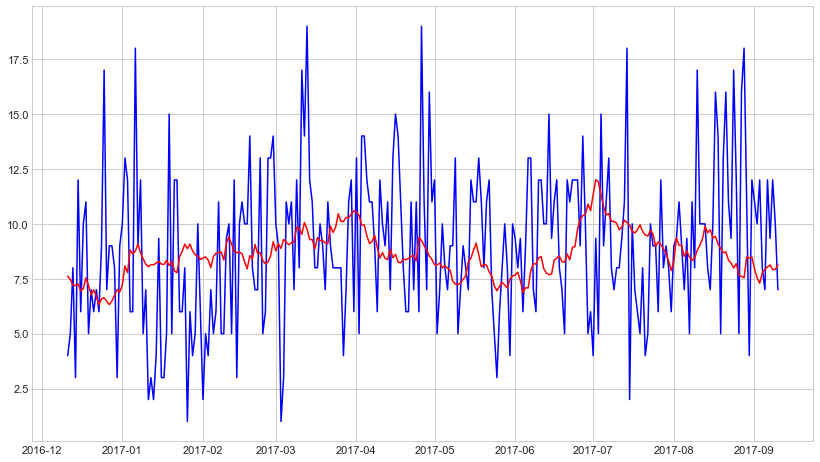

In [41]:
# plot forecasts against actual outcomes
plt.plot(test.visits, color="blue")
plt.plot(test.SimpleExp, color="red")
plt.show()

<a id="17"></a>
## Holt Linear Trend
* This is an extension of the simple exponential smoothing method that takes into account the trend component while generating forecasts. This method involves two smoothing equations, one for the level and one for the trend component.

In [42]:
fit_holt = Holt(np.asarray(train["visits"])).fit(smoothing_level = 0.1,smoothing_slope = 0.1)

test['Holt_linear_model'] = fit_holt.predict(len(test)-19)

In [43]:
mse = mean_squared_error(test.visits, test.Holt_linear_model)
print("Holt_linear_model_MSE:{:.0f}".format(mse))

Holt_linear_model_MSE:14


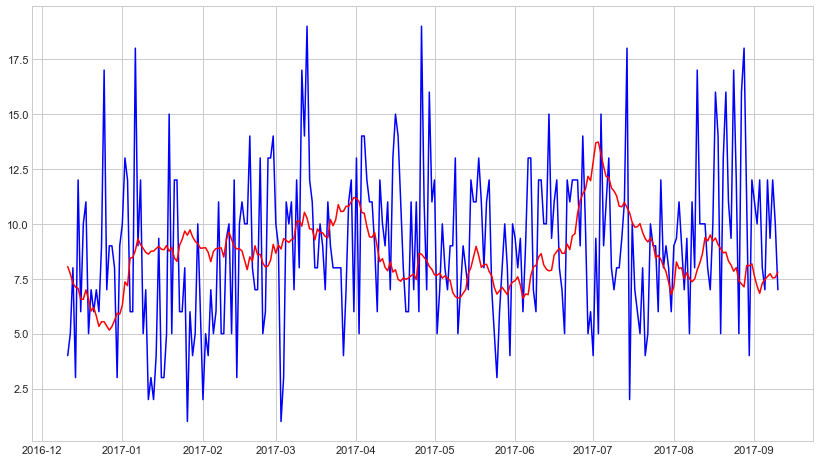

In [44]:
# plot forecasts against actual outcomes
plt.plot(test.visits, color="blue")
plt.plot(test.Holt_linear_model, color="red")
plt.show()

<a id="18"></a>
## Holt-Winters Method
* This is an extension of the holt-linear model that takes into account both the trend and seasonality component while generating forecasts.



In [45]:
fit_holt_winter = ExponentialSmoothing(np.asarray(train["visits"]) ,seasonal_periods=6 ,trend='add', seasonal='add',).fit()
test['Holt_Winter'] = fit_holt_winter.predict(len(test)-19)

In [46]:
mse = mean_squared_error(test.visits, test.Holt_Winter)
print("Holt_Winter_MSE:{:.0f}".format(mse))

Holt_Winter_MSE:14


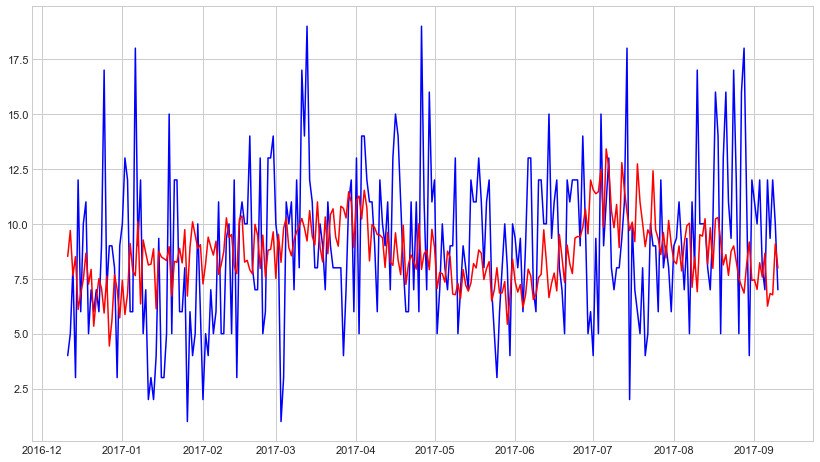

In [47]:
# plot forecasts against actual outcomes
plt.plot(test.visits, color="blue")
plt.plot(test.Holt_Winter, color="red")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

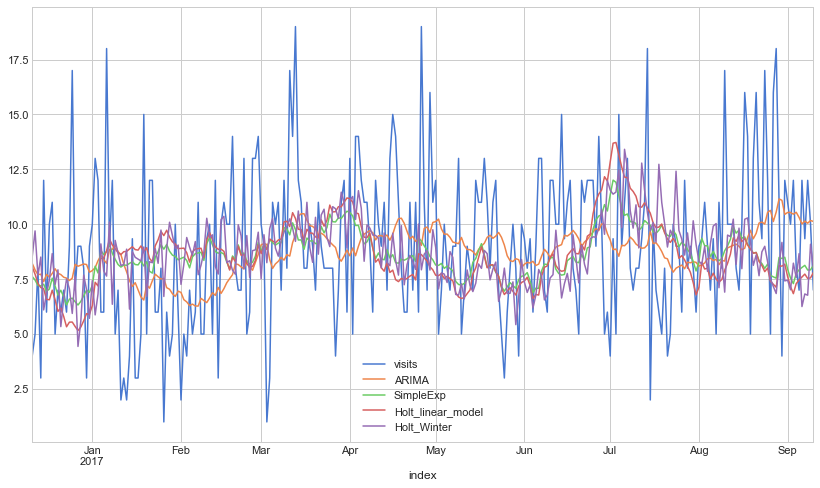

In [48]:
test.plot()
plt.show

<a id="19"></a>
## Deep Learning Methods

<a id="20"></a>
## RNN

In [49]:
from sklearn.preprocessing import MinMaxScaler
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

Using TensorFlow backend.


In [50]:
train_size = int(len(df_2) * 0.66)
test_size = len(df_2) - train_size
train, test = df_2.iloc[0:train_size], df_2.iloc[train_size:len(df_2)]
print(train.shape, test.shape)

(529, 1) (274, 1)


### Feature Scaling

In [51]:
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train.loc[:,["visits"]].values)
train_scaled

array([[0.84210526],
       [0.36842105],
       [0.15789474],
       [0.15789474],
       [0.15789474],
       [0.26315789],
       [0.26315789],
       [0.21052632],
       [0.15789474],
       [0.21052632],
       [0.15789474],
       [0.89473684],
       [0.31578947],
       [0.73684211],
       [0.31578947],
       [0.15789474],
       [0.21052632],
       [0.36842105],
       [0.26315789],
       [0.10526316],
       [0.84210526],
       [0.49164318],
       [0.68421053],
       [0.42105263],
       [0.47368421],
       [0.52631579],
       [0.84210526],
       [0.57894737],
       [0.10526316],
       [0.10526316],
       [0.42105263],
       [0.21052632],
       [0.05263158],
       [0.68421053],
       [0.36842105],
       [0.21052632],
       [0.21052632],
       [0.15789474],
       [0.        ],
       [0.15789474],
       [0.21052632],
       [0.47368421],
       [0.15789474],
       [0.26315789],
       [0.21052632],
       [0.31578947],
       [0.47368421],
       [0.157

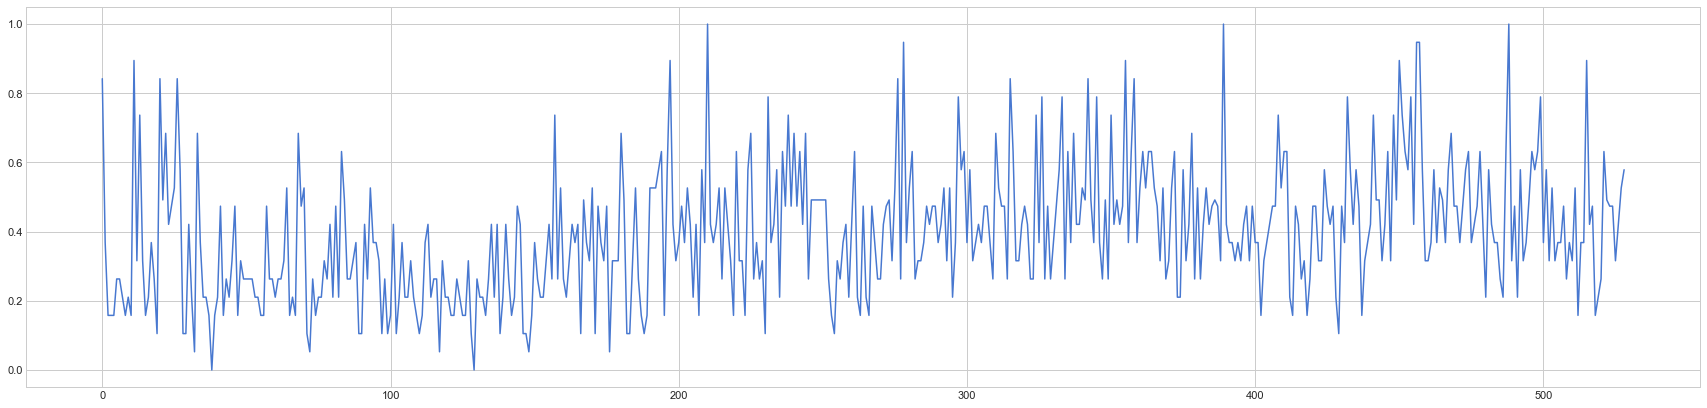

In [52]:
f,ax = plt.subplots(figsize = (30,7))
plt.plot(train_scaled)
plt.show()

### Creating a data structure with 50 timesteps and 1 output

In [64]:
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 529):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [54]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print("X:",X_train)
print("X size:",X_train.size)

X size: 23950


## Create RNN Model

In [55]:
# Initialising the RNN
model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 250, batch_size = 32)

Epoch 1/250
479/479 [==============================] - 3s 6ms/step - loss: 0.5143
Epoch 2/250
479/479 [==============================] - 2s 3ms/step - loss: 0.3282
Epoch 3/250
479/479 [==============================] - 2s 3ms/step - loss: 0.3061
Epoch 4/250
479/479 [==============================] - 2s 3ms/step - loss: 0.2801
Epoch 5/250
479/479 [==============================] - 2s 3ms/step - loss: 0.2658
Epoch 6/250
479/479 [==============================] - 2s 3ms/step - loss: 0.2427
Epoch 7/250
479/479 [==============================] - 2s 3ms/step - loss: 0.2252
Epoch 8/250
479/479 [==============================] - 2s 3ms/step - loss: 0.2028
Epoch 9/250
479/479 [==============================] - 2s 3ms/step - loss: 0.1843
Epoch 10/250
479/479 [==============================] - 2s 3ms/step - loss: 0.1470
Epoch 11/250
479/479 [==============================] - 2s 3ms/step - loss: 0.1699
Epoch 12/250
479/479 [==============================] - 2s 3ms/step - loss: 0.1590
Epoch 13/250


479/479 [==============================] - 1s 3ms/step - loss: 0.0228
Epoch 196/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0232
Epoch 197/250
479/479 [==============================] - 2s 4ms/step - loss: 0.0208
Epoch 198/250
479/479 [==============================] - 2s 4ms/step - loss: 0.0217
Epoch 199/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0207
Epoch 200/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0219
Epoch 201/250
479/479 [==============================] - 2s 4ms/step - loss: 0.0230
Epoch 202/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0229
Epoch 203/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0213
Epoch 204/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0218
Epoch 205/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0208
Epoch 206/250
479/479 [==============================] - 1s 3ms/step - loss: 0.0210
Epoch 

## Predictions and Visualising RNN Model

In [56]:
test.head()

visits
index             
2016-12-11     4.0
2016-12-12     5.0
2016-12-13     8.0
2016-12-14     3.0
2016-12-15    12.0

In [57]:
test_visits = test.loc[:,["visits"]].values
test_visits

array([[ 4.        ],
       [ 5.        ],
       [ 8.        ],
       [ 3.        ],
       [12.        ],
       [ 6.        ],
       [10.        ],
       [11.        ],
       [ 5.        ],
       [ 7.        ],
       [ 6.        ],
       [ 7.        ],
       [ 6.        ],
       [ 9.        ],
       [17.        ],
       [ 7.        ],
       [ 9.        ],
       [ 9.        ],
       [ 8.        ],
       [ 3.        ],
       [ 9.        ],
       [10.        ],
       [13.        ],
       [12.        ],
       [ 6.        ],
       [ 6.        ],
       [18.        ],
       [ 9.        ],
       [12.        ],
       [ 5.        ],
       [ 7.        ],
       [ 2.        ],
       [ 3.        ],
       [ 2.        ],
       [ 4.        ],
       [ 9.34122042],
       [ 3.        ],
       [ 3.        ],
       [ 5.        ],
       [15.        ],
       [ 5.        ],
       [12.        ],
       [12.        ],
       [ 6.        ],
       [ 6.        ],
       [ 8

In [65]:
# Make ready for prediction test dataset
dataset_total = df_2.copy()
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs

array([[0.42105263],
       [0.21052632],
       [0.57894737],
       [0.42105263],
       [0.36842105],
       [0.36842105],
       [0.26315789],
       [0.21052632],
       [0.63157895],
       [1.        ],
       [0.31578947],
       [0.47368421],
       [0.21052632],
       [0.57894737],
       [0.31578947],
       [0.36842105],
       [0.49164318],
       [0.63157895],
       [0.57894737],
       [0.63157895],
       [0.78947368],
       [0.36842105],
       [0.57894737],
       [0.31578947],
       [0.52631579],
       [0.31578947],
       [0.36842105],
       [0.36842105],
       [0.47368421],
       [0.26315789],
       [0.36842105],
       [0.31578947],
       [0.52631579],
       [0.15789474],
       [0.36842105],
       [0.36842105],
       [0.89473684],
       [0.42105263],
       [0.47368421],
       [0.15789474],
       [0.21052632],
       [0.26315789],
       [0.63157895],
       [0.49164318],
       [0.47368421],
       [0.47368421],
       [0.31578947],
       [0.421

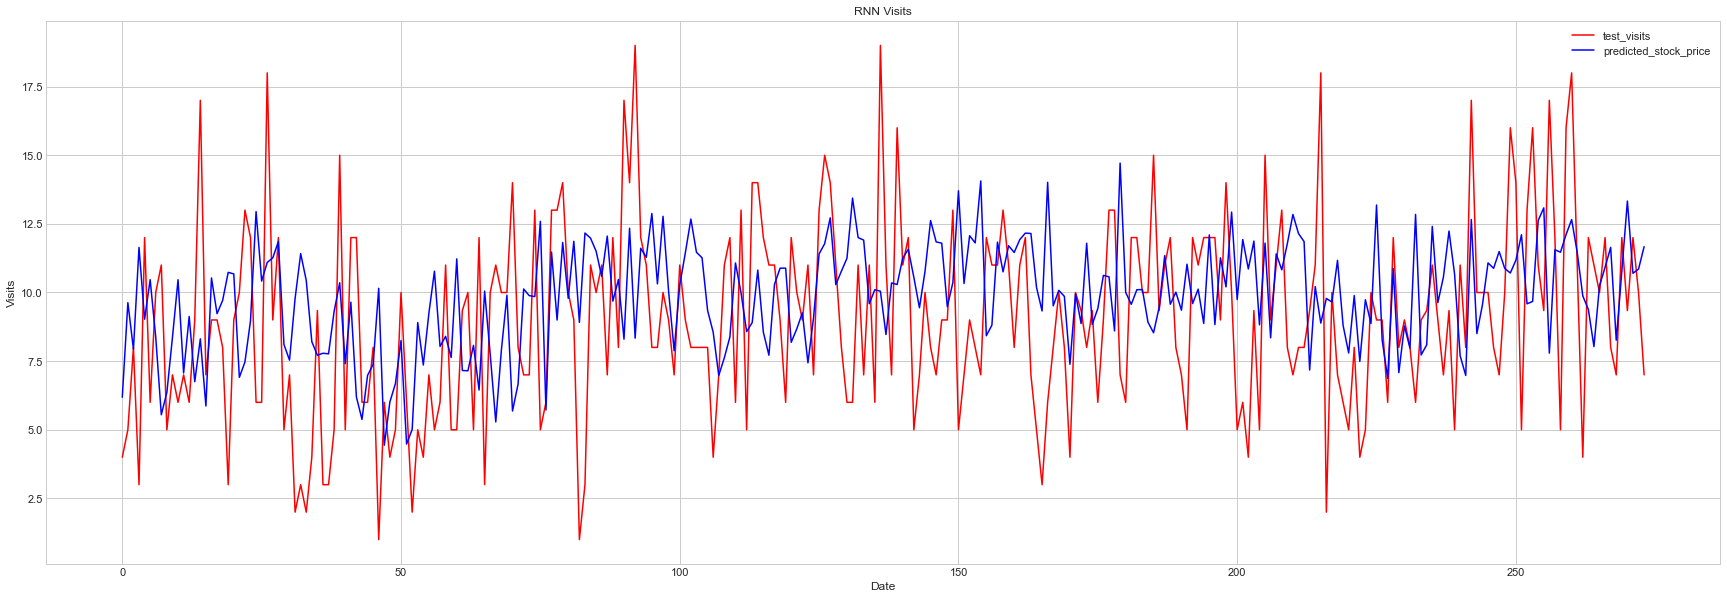

In [74]:
X_test = []
for i in range(timesteps, 324):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_rnn = model.predict(X_test)
predicted_rnn = scaler.inverse_transform(predicted_rnn)

# Visualising the results
f,ax = plt.subplots(figsize = (30,10))
plt.plot(test_visits, color = 'red', label = 'test_visits')
plt.plot(predicted_rnn, color = 'blue', label = 'predicted_stock_price')
plt.title('RNN Visits')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.legend()
plt.show()

In [75]:
test["RNN"] = predicted_rnn
test.head()

visits        RNN
index                        
2016-12-11     4.0   6.185381
2016-12-12     5.0   9.629666
2016-12-13     8.0   7.936641
2016-12-14     3.0  11.641243
2016-12-15    12.0   9.026845

In [76]:
mse = mean_squared_error(test.visits, test.RNN)
print("RNN_MSE:{:.0f}".format(mse))

RNN_MSE:15


<a id="21"></a>
## LSTM

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [183]:
df_2 = df.copy()
df_2[anomalies.visits == True] = np.mean(df.visits)
df_2 = df_2.values.reshape(-1,1)
df_2 = df_2.astype("float32")
df_2.shape

(803, 1)

In [184]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
df_2 = scaler.fit_transform(df_2)

In [185]:
train_size = int(len(df_2) * 0.66)
test_size = len(df_2) - train_size
train = df_2[0:train_size,:]
test = df_2[train_size:len(df_2),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 529, test size: 274 


In [187]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  
trainX.shape, trainY.shape

((518, 10), (518,))

In [188]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)  
testX.shape, testY.shape

((263, 10), (263,))

In [189]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape, testX.shape

((518, 1, 10), (263, 1, 10))

### Create LSTM Model

In [190]:
# model
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(trainX, trainY, epochs=250, batch_size=1)

Epoch 1/250
518/518 [==============================] - 1s 1ms/step - loss: 0.0414
Epoch 2/250
518/518 [==============================] - 1s 979us/step - loss: 0.0319
Epoch 3/250
518/518 [==============================] - 0s 932us/step - loss: 0.0317
Epoch 4/250
518/518 [==============================] - 1s 977us/step - loss: 0.0317
Epoch 5/250
518/518 [==============================] - 0s 964us/step - loss: 0.0318
Epoch 6/250
518/518 [==============================] - 0s 936us/step - loss: 0.0314
Epoch 7/250
518/518 [==============================] - 0s 956us/step - loss: 0.0315
Epoch 8/250
518/518 [==============================] - ETA: 0s - loss: 0.031 - 0s 963us/step - loss: 0.0313
Epoch 9/250
518/518 [==============================] - 0s 955us/step - loss: 0.0314
Epoch 10/250
518/518 [==============================] - 0s 958us/step - loss: 0.0314
Epoch 11/250
518/518 [==============================] - 0s 956us/step - loss: 0.0312
Epoch 12/250
518/518 [==============================

Epoch 190/250
518/518 [==============================] - 1s 984us/step - loss: 0.0284
Epoch 191/250
518/518 [==============================] - 1s 984us/step - loss: 0.0280
Epoch 192/250
518/518 [==============================] - 0s 958us/step - loss: 0.0283
Epoch 193/250
518/518 [==============================] - 0s 964us/step - loss: 0.0284 0s - loss
Epoch 194/250
518/518 [==============================] - 0s 959us/step - loss: 0.0283
Epoch 195/250
518/518 [==============================] - ETA: 0s - loss: 0.0278- ETA: 0s - loss: 0.02 - 0s 959us/step - loss: 0.0284
Epoch 196/250
518/518 [==============================] - 1s 968us/step - loss: 0.0282
Epoch 197/250
518/518 [==============================] - 0s 958us/step - loss: 0.0284
Epoch 198/250
518/518 [==============================] - 0s 940us/step - loss: 0.0283
Epoch 199/250
518/518 [==============================] - 0s 961us/step - loss: 0.0278
Epoch 200/250
518/518 [==============================] - 0s 963us/step - loss: 0.02

## Predictions and Visualising LSTM Model

In [191]:
# Predict
trainPredict = model_lstm.predict(trainX)
testPredict = model_lstm.predict(testX)

In [192]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

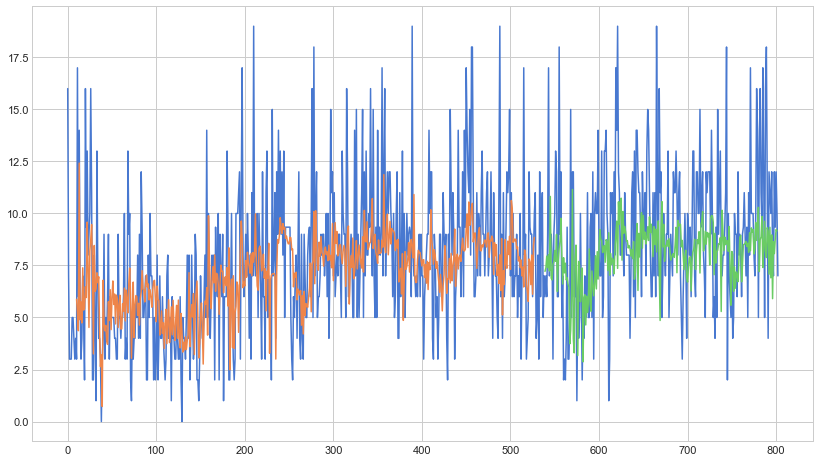

In [193]:
# shifting train
trainPredictPlot = np.empty_like(df_2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(df_2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(df_2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [210]:
mse = mean_squared_error(testY.reshape(-1,1),testPredict)
print("LSTM_MSE:{:.0f}".format(mse))

LSTM_MSE:14


<a id="22"></a>
## Compare Models

In [208]:
models = ["ARIMA","SimpleExp","HoltLinearTrend","HoltWintersMethod","RNN","LSTM"]
models_rms = [12,13,14,14,15,14]

Text(0, 0.5, 'RMS')

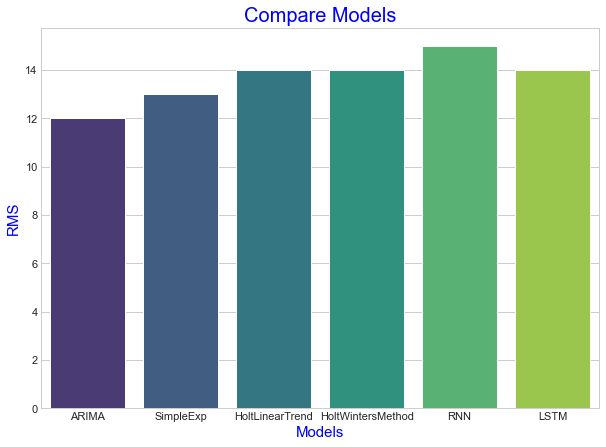

In [209]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x=models, y=models_rms,palette="viridis");
plt.title("Compare Models",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('RMS',fontsize = 15,color='blue')